### 과제 11 : 성적처리 Pandas
- StuData.csv파일에서 학생들의 점수를 읽어 들여, 아래와 같은 성적표를 Pandas를 이용하여 완성하고, 각 과목펼 평균과 학생 개인의 평균 점수를 구하고, 이를 과목별 그래프와 학생별 그래프로 나타내시오.

1. StuData.csv 파일을 다운받아, pandas.read_csv('StuData.csv', index_col = 0)로 파일을 읽으시오
2. 아래와 같은 Com 점수를 추가하고, 학생별 평균을 구하시오
3. 각 학생들의 과목점수, 평균을 그래프로 그리시오
4. 과목별 평균을 구하고, 그래프로 그리시오
5. 타이틀, 범례도 포함하고 그래프의 모양은 보기 좋게 자유롭게 작성하시오

### 과제 해결
- 객체 지향 프로그래밍을 활용하였습니다
- add_average 함수는 과목평균, 학생의 평균 점수를 추가해 주는 함수입니다
- get_info 함수는 data base의 간략한 정보를 출력해 주는 함수입니다
- fill_nan 함수는 결측치를 채워주는 함수입니다
- print_data 함수는 dataframe을 출력해 주는 함수입니다
- 이외에 다양한 시각화 함수를 추가하였습니다. 한글 폰트 오류 문제를 해결하기 위해, plt.rc를 이용해 한글 폰트를 직접 불러왔습니다
- main 함수에서, data import와 processing을 모두 처리합니다

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2201 to 평균
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      7 non-null      object 
 1   국어      7 non-null      float64
 2   영어      7 non-null      float64
 3   수학      7 non-null      float64
 4   Com     7 non-null      float64
 5   평균      7 non-null      float64
dtypes: float64(5), object(1)
memory usage: 392.0+ bytes
       이름     국어     영어     수학    Com     평균
2201  홍길일  90.00  80.00  85.00  78.00  83.25
2202  홍길이  90.00  85.00  90.00  99.00  91.00
2203  홍길삼  80.00  80.00  80.00  90.00  82.50
2204  홍길사  90.00  92.00  83.00  45.00  77.50
2205  홍길오  85.00  85.00  90.00  80.00  85.00
2206  홍길육  95.00  95.00  80.00  75.00  86.25
평균     평균  88.33  86.17  84.67  77.83  84.25


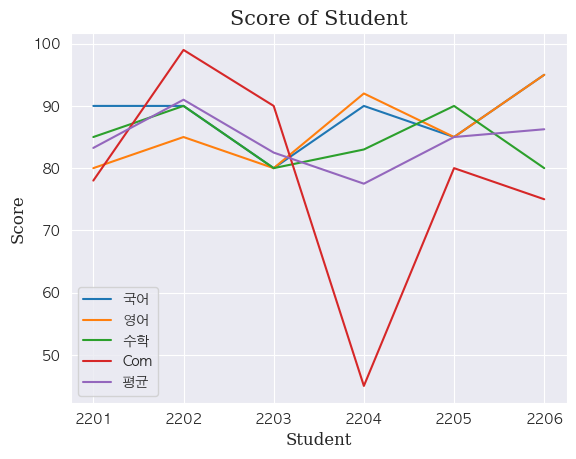

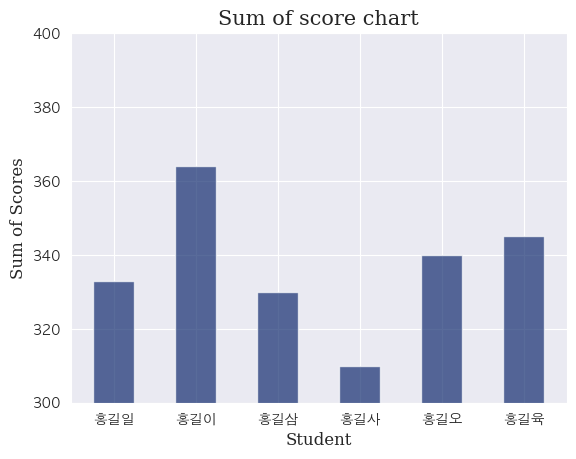

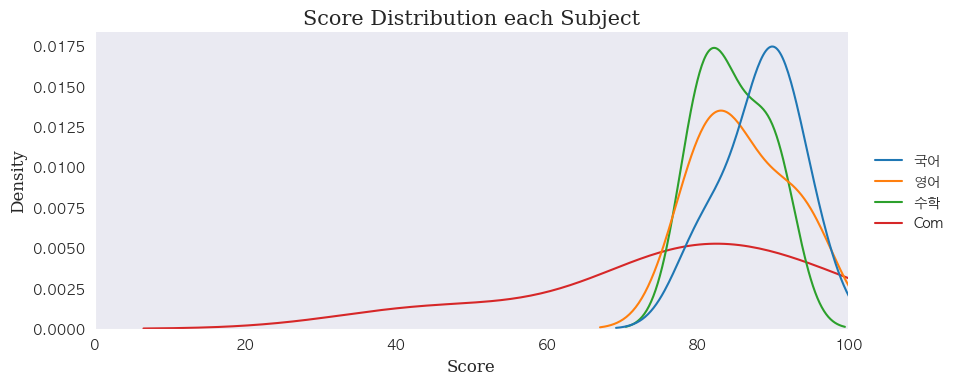

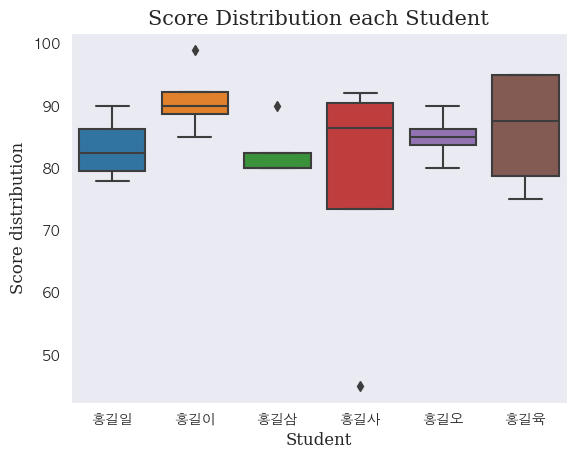

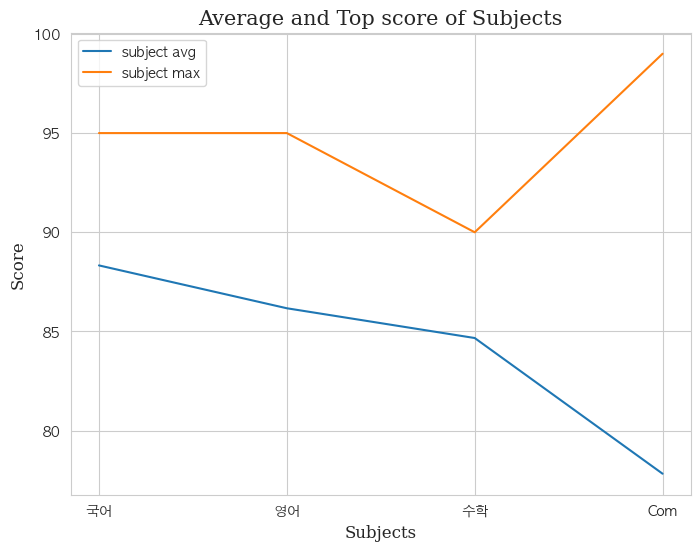

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

class CalculGrade() :
    def __init__(self, data) :
        self.data = data
    
    # Average columns 추가
    def add_average(self) :
        self.data['Com'] = [78,99,90,45,80,75]
        self.data['평균'] = self.data.iloc[:,1:].mean(axis = 1)
        self.data.loc['평균'] = self.data.iloc[:,1:].mean(axis = 0).round(2)
        self.data

    # get information
    def get_info(self) :
        self.data.info()

    # missing value
    def fill_nan(self) :
        self.data.fillna('평균', inplace = True)
        self.data
        
    def print_data(self) :
        print(self.data)
    
    def plot_score_subject(self) :
        sns.set_style('darkgrid')
        plt.rc('font', family = 'AppleGothic')
        self.data.iloc[:-1,1:].plot()
        self.data.index = self.data['이름']
        plt.rc('font', family = 'AppleGothic')
        plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
        plt.ylabel('Score', fontsize = 12, fontfamily = 'Serif')
        plt.title('Score of Student', fontsize = 15, fontfamily = 'Serif')
        plt.legend()
        plt.show()
        
    def plot_score_student(self) :
        sns.set_style('darkgrid')
        plt.rc('font', family = 'AppleGothic')
        plt.bar(self.data.index[:-1], self.data.iloc[:-1,1:-1].sum(axis = 1), 
                width = 0.5, alpha = 0.7, color = '#132c6f')
        plt.ylim([300,400])
        plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
        plt.ylabel('Sum of Scores', fontsize = 12, fontfamily = 'Serif')
        plt.title('Sum of score chart', fontsize = 15, fontfamily = 'Serif')
        plt.show()
        
    def plot_dist_score(self) :
        sns.set_style('dark')
        plt.rc('font', family = 'AppleGothic')
        sns.displot(data = self.data.iloc[:-1,1:-1], kind = "kde", height = 3.5, aspect = 2.5)
        plt.xlabel('Score', fontsize = 12, fontfamily = 'Serif')
        plt.ylabel('Density', fontsize = 12, fontfamily = 'Serif')
        plt.xlim([0,100])
        plt.title('Score Distribution each Subject', fontsize = 15, fontfamily = 'Serif')
        plt.show()
        
    def plot_dist_student(self) :
        sns.set_style('dark')
        plt.rc('font', family = 'AppleGothic')
        sns.boxplot(data = self.data.iloc[:-1,1:-1].T)
        plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
        plt.ylabel('Score distribution', fontsize = 12, fontfamily = 'Serif')
        plt.title('Score Distribution each Student', fontsize = 15, fontfamily = 'Serif')
        plt.show()
        
    def plot_mean_average(self) :
        sns.set_style('whitegrid')
        plt.rc('font', family = 'AppleGothic')
        plt.figure(figsize = (8,6))
        plt.plot(self.data.columns[1:-1], self.data.loc['평균'][1:-1], label = 'subject avg')
        plt.plot(self.data.columns[1:-1], self.data.max(axis = 0)[1:-1], label = 'subject max')
        plt.xlabel('Subjects', fontsize = 12, fontfamily = 'Serif')
        plt.ylabel('Score', fontsize = 12, fontfamily = 'Serif')
        plt.legend()
        plt.title('Average and Top score of Subjects', fontsize = 15, fontfamily = 'Serif')
        plt.show()
        
def main() :
    # Set Database
    data = pd.read_csv('StuData.csv', index_col = 0)
    
    # Processing
    Class = CalculGrade(data)
    Class.add_average()
    Class.fill_nan()
    Class.get_info()
    Class.print_data()
    
    # Visualization
    Class.plot_score_subject()
    Class.plot_score_student()
    Class.plot_dist_score()
    Class.plot_dist_student()
    Class.plot_mean_average()
    
if __name__ == '__main__' : main()

In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

data = pd.read_csv('StuData.csv', index_col = 0)
data['Com'] = [78,99,90,45,80,75]
data['평균'] = data.mean(axis = 1, numeric_only = True)
data.loc['평균'] = data.mean(axis = 0, numeric_only = True).round(2)
data.fillna('평균', inplace = True)

In [6]:
data

,이름,국어,영어,수학,Com,평균
2201,홍길일,90.00,80.00,85.00,78.00,83.25
2202,홍길이,90.00,85.00,90.00,99.00,91.00
2203,홍길삼,80.00,80.00,80.00,90.00,82.50
2204,홍길사,90.00,92.00,83.00,45.00,77.50
2205,홍길오,85.00,85.00,90.00,80.00,85.00
2206,홍길육,95.00,95.00,80.00,75.00,86.25
평균,평균,88.33,86.17,84.67,77.83,84.25


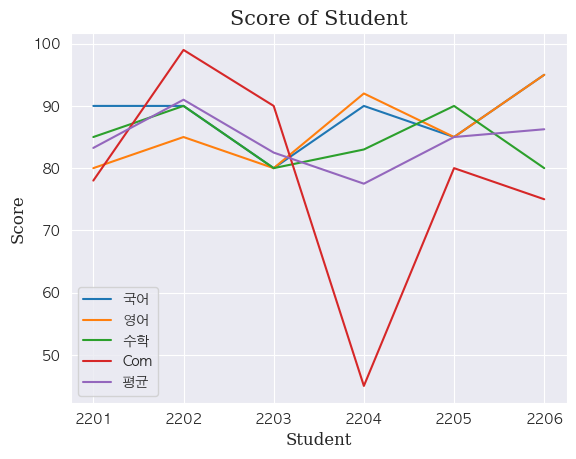

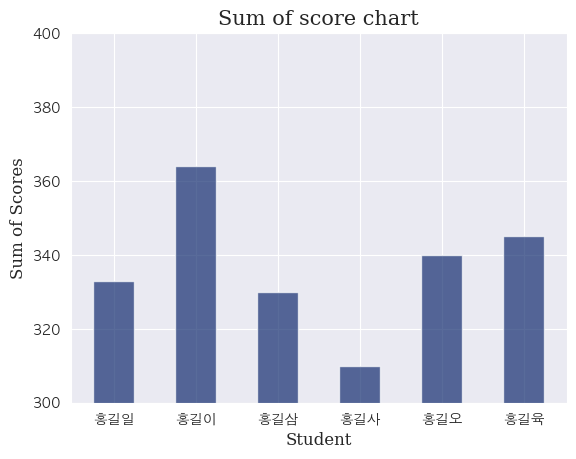

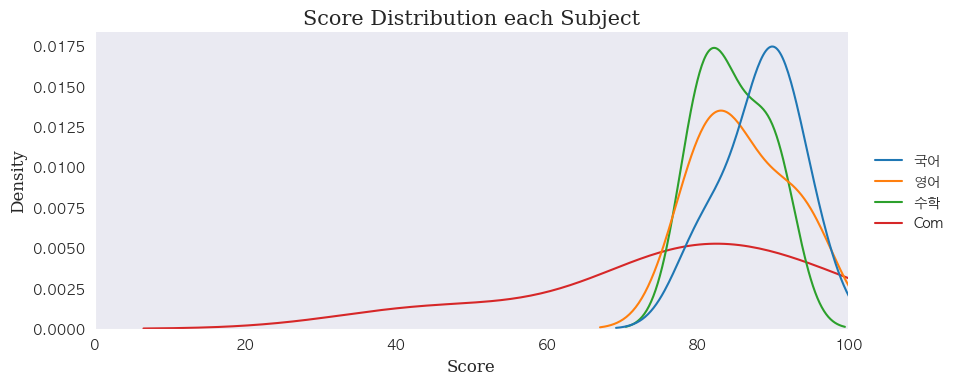

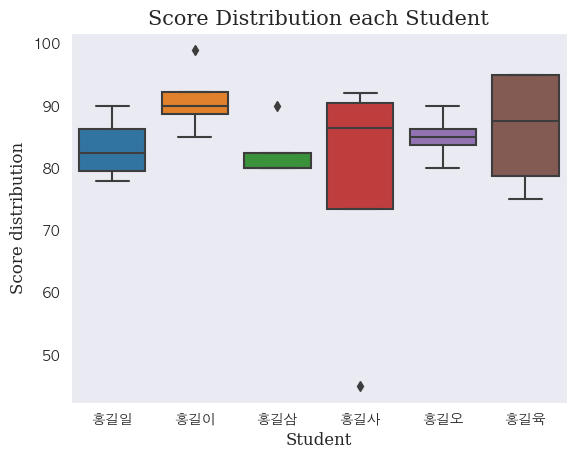

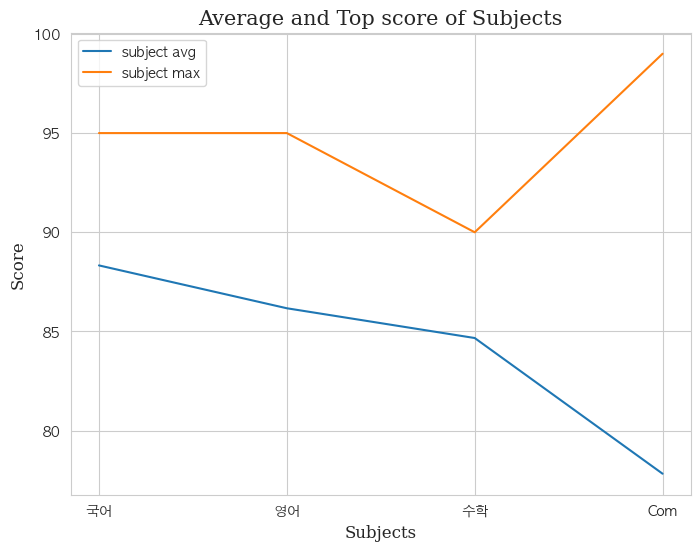

In [7]:
sns.set_style('darkgrid')
plt.rc('font', family = 'AppleGothic')
data.iloc[:-1,1:].plot()
data.index = data['이름']
plt.rc('font', family = 'AppleGothic')
plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
plt.ylabel('Score', fontsize = 12, fontfamily = 'Serif')
plt.title('Score of Student', fontsize = 15, fontfamily = 'Serif')
plt.legend()
plt.show()


sns.set_style('darkgrid')
plt.rc('font', family = 'AppleGothic')
plt.bar(data.index[:-1], data.iloc[:-1,1:-1].sum(axis = 1), 
        width = 0.5, alpha = 0.7, color = '#132c6f')
plt.ylim([300,400])
plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
plt.ylabel('Sum of Scores', fontsize = 12, fontfamily = 'Serif')
plt.title('Sum of score chart', fontsize = 15, fontfamily = 'Serif')
plt.show()
        
sns.set_style('dark')
plt.rc('font', family = 'AppleGothic')
sns.displot(data = data.iloc[:-1,1:-1], kind = "kde", height = 3.5, aspect = 2.5)
plt.xlabel('Score', fontsize = 12, fontfamily = 'Serif')
plt.ylabel('Density', fontsize = 12, fontfamily = 'Serif')
plt.xlim([0,100])
plt.title('Score Distribution each Subject', fontsize = 15, fontfamily = 'Serif')
plt.show()

sns.set_style('dark')
plt.rc('font', family = 'AppleGothic')
sns.boxplot(data = data.iloc[:-1,1:-1].T)
plt.xlabel('Student', fontsize = 12, fontfamily = 'Serif')
plt.ylabel('Score distribution', fontsize = 12, fontfamily = 'Serif')
plt.title('Score Distribution each Student', fontsize = 15, fontfamily = 'Serif')
plt.show()
        
sns.set_style('whitegrid')
plt.rc('font', family = 'AppleGothic')
plt.figure(figsize = (8,6))
plt.plot(data.columns[1:-1], data.loc['평균'][1:-1], label = 'subject avg')
plt.plot(data.columns[1:-1], data.max(axis = 0)[1:-1], label = 'subject max')
plt.xlabel('Subjects', fontsize = 12, fontfamily = 'Serif')
plt.ylabel('Score', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.title('Average and Top score of Subjects', fontsize = 15, fontfamily = 'Serif')
plt.show()